In [99]:
import pandas as pd 
import numpy as np
import re

import glob
men_data = glob.glob("finishline_men_*")
women_data = glob.glob("finishline_women_*")

from matplotlib import pyplot as plt
plt.rcdefaults()
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [100]:
# read in men shoes data
men_df = pd.concat([pd.read_csv(f, header = None) for f in men_data])

# label column names
men_df.columns = ["item", "color", "price", "saleprice", "review", "rating"]

# remove duplicated items for different colors of the same shoes  
men_df.drop_duplicates(keep=False, inplace=True)

# add in gender column
men_df.loc[:,'gender'] = 'men'

In [101]:
# read in women shoes data
women_df = pd.concat([pd.read_csv(f, header = None) for f in women_data])

# label column names
women_df.columns = ["item", "color", "price", "saleprice", "review", "rating"]

# remove duplicated items for different colors of the same shoes
women_df.drop_duplicates(keep=False, inplace=True)

# add in gender column
women_df.loc[:,'gender'] = 'women'

In [102]:
# combine men and women data
total_df = pd.concat([men_df, women_df])

# filter out featured brands
nike = total_df[total_df['item'].str.contains("Nike")]   # jordan brand shoes aren't included here
adidas = total_df[total_df['item'].str.contains("adidas")]
jordan = total_df[total_df['item'].str.contains("Jordan")]
under = total_df[total_df['item'].str.contains("Under Armour")]
puma = total_df[total_df['item'].str.contains("Puma")]

# add brand column
nike.loc[:,'brand'] = 'nike'
adidas.loc[:,'brand'] = 'adidas'
jordan.loc[:,'brand'] = 'jordan'
under.loc[:,'brand'] = 'under'
puma.loc[:,'brand'] = 'puma'
brand_df = pd.concat([nike, adidas, jordan, under, puma])

# shoes type
run = brand_df[brand_df['item'].str.contains("Running")] 
casual = brand_df[brand_df['item'].str.contains("Casual")]
bask = brand_df[brand_df['item'].str.contains("Basketball")]
train = brand_df[brand_df['item'].str.contains("Training")]

# add type column. combine_df only has nike and adidas shoes
run.loc[:,'type'] = 'running'
casual.loc[:,'type'] = 'casual'
bask.loc[:,'type'] = 'basketball'
train.loc[:,'type'] = 'training'

combine_df = pd.concat([run, casual, bask, train])

In [103]:
# convert price
combine_df['price'] = combine_df['price'].str.replace('$', '').astype(float).round(2)

# convert saleprice to numeric 
notnan = combine_df.saleprice.notnull() 
notseeprice = combine_df.saleprice != 'See price in cart'
combine_df.loc[notnan & notseeprice,'saleprice'] = combine_df.loc[notnan & notseeprice,'saleprice'].str.replace('$', '').astype(float).round(2)

# convert number of color to numeric value
combine_df['color'] = combine_df['color'].str.replace(' Colors| Color', '').astype(int)

# combine_df still has doublicated items becasue for items that are on sale,
# there are different sale prices for different colors 


In [104]:
# contain only unique items of shoes to look at color options, rating, and number of reviews 
no_dup_df = combine_df.drop_duplicates('item')

No handles with labels found to put in legend.


Text(0.5,1,'Finishline Shoes Merchandise')

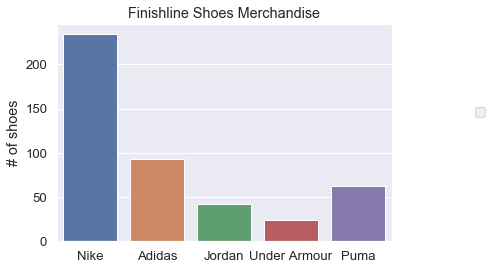

In [140]:
sns.set(font_scale = 1.2)  # this will set the font scale for all plots

# Count Plot for different brands on finishline
sns.countplot(x='brand', data=no_dup_df, palette="deep").set(xticklabels=['Nike', 'Adidas', 'Jordan', 'Under Armour', 'Puma'])
plt.xlabel('')
plt.ylabel('# of shoes')
plt.title('Finishline Shoes Merchandise')

['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#937860',
 '#da8bc3',
 '#8c8c8c',
 '#ccb974',
 '#64b5cd']

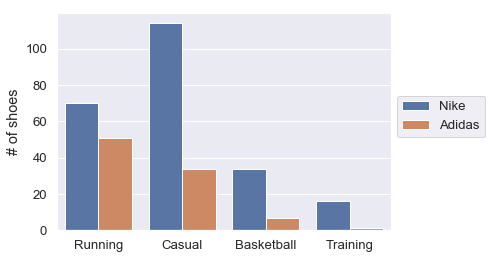

In [148]:
# dataframe with only nike and adidas
nike_ad_df = no_dup_df.loc[(no_dup_df.brand == 'nike')|(no_dup_df.brand == 'adidas'),]

# look at the different types of shoes amount in nike and adidas
sns.countplot(x='type', data=nike_ad_df, hue="brand", palette="deep").set(xticklabels=['Running', 'Casual', 'Basketball', 'Training'])
plt.xlabel('')
plt.ylabel('# of shoes')
plt.legend(['Nike', 'Adidas'], bbox_to_anchor=(1.3, 0.65))
pal.as_hex()

In [20]:
unique_df = nike_ad_df.loc[(nike_ad_df.type == 'running')|(nike_ad_df.type == 'casual')]
men_unique_df = unique_df.loc[unique_df.gender == 'men',]
women_unique_df = unique_df.loc[unique_df.gender == 'women',]

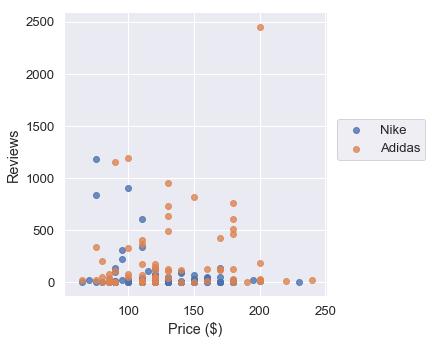

In [21]:
# review vs price
unique_df = nike_ad_df.loc[(nike_ad_df.type == 'running')|(nike_ad_df.type == 'casual')]
sns.lmplot("price", "review", unique_df, fit_reg=False, hue="brand", palette="deep", legend=False)
plt.xlabel('Price ($)')
plt.ylabel('Reviews')
plt.legend(['Nike', 'Adidas'], bbox_to_anchor=(1.4, 0.65)) 

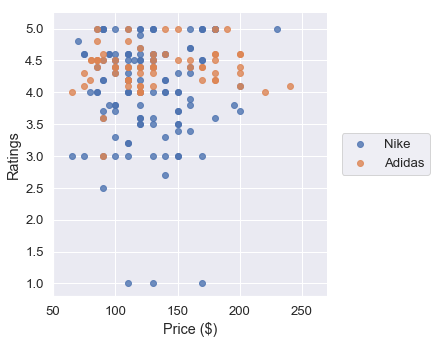

In [22]:
# rating vs price
sns.lmplot("price", "rating", unique_df, fit_reg=False, hue="brand", palette="deep", legend=False)
plt.xlabel('Price ($)')
plt.ylabel('Ratings')
plt.xlim(50,270)
plt.legend(['Nike', 'Adidas'], bbox_to_anchor=(1.4, 0.6)) 

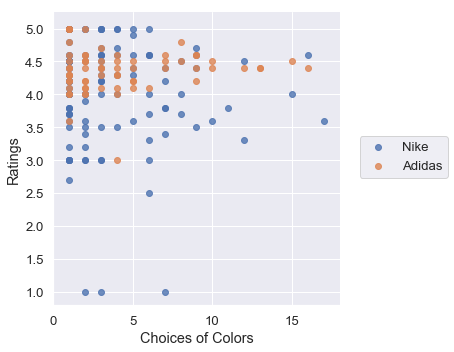

In [45]:
# rating vs color
sns.lmplot("color", "rating", unique_df, fit_reg=False, hue="brand", palette="deep", legend=False)
plt.xlabel('Choices of Colors')
plt.ylabel('Ratings')
plt.legend(['Nike', 'Adidas'], bbox_to_anchor=(1.4, 0.6)) 

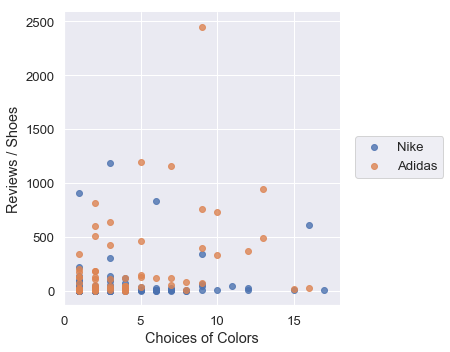

In [47]:
# reviews vs color
sns.lmplot("color", "review", unique_df, fit_reg=False, hue="brand", palette="deep", legend=False)
plt.xlabel('Choices of Colors')
plt.ylabel('Reviews / Shoes')
plt.legend(['Nike', 'Adidas'], bbox_to_anchor=(1.4, 0.6)) 

In [23]:
########## MEN DATA ANALYSIS ################################################################################

In [24]:
colFun = {'item':['count'],
          'review': ['count', 'max', 'sum', 'mean'],
          'rating': ['min', 'max', 'mean']}

# item count, review count, max review number for men
men_sum = men_unique_df[['item', 'review', 'rating', 'brand', 'type']].groupby(['brand','type']).agg(colFun)
men_sum

item review                             rating               
               count  count     max     sum        mean    min  max      mean
brand  type                                                                  
adidas casual     20     18  1154.0  6399.0  355.500000    4.1  4.7  4.416667
       running    27     19  2447.0  4244.0  223.368421    3.6  5.0  4.357895
nike   casual     57     35  1185.0  2951.0   84.314286    1.0  5.0  4.125714
       running    38     28   609.0  1349.0   48.178571    3.0  5.0  4.096429

In [25]:
# Ave review, rating per item, men
men_sum.loc[:, (slice(None), 'mean')]

review    rating
                      mean      mean
brand  type                         
adidas casual   355.500000  4.416667
       running  223.368421  4.357895
nike   casual    84.314286  4.125714
       running   48.178571  4.096429

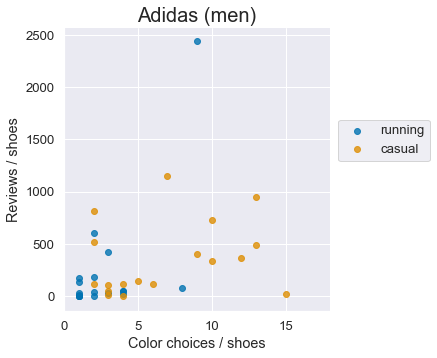

In [26]:
# color vs reviews adidas men
adidas_men = men_unique_df.loc[men_unique_df.brand=='adidas',]
sns.lmplot("color", "review", adidas_men, fit_reg=False, hue="type", palette="colorblind", legend=False)
plt.xlabel('Color choices / shoes')
plt.ylabel('Reviews / shoes')
plt.title('Adidas (men)', {'fontsize': 20})
plt.xlim(0,18)
plt.legend(['running', 'casual'], bbox_to_anchor=(1.4, 0.7))

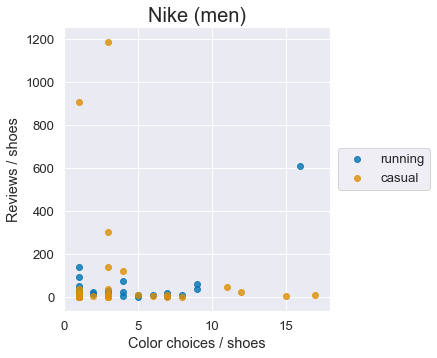

In [27]:
# color vs reviews nike men
nike_men = men_unique_df.loc[men_unique_df.brand=='nike',]
sns.lmplot("color", "review", nike_men, fit_reg=False, hue="type", palette="colorblind", legend=False)
plt.xlabel('Color choices / shoes')
plt.ylabel('Reviews / shoes')
plt.title('Nike (men)', {'fontsize': 20})
plt.legend(['running', 'casual'], bbox_to_anchor=(1.4, 0.6))
# casual shoes with around 1000 revies only have 1-3 color selecction
# nike should have more color selection for 

,item,color,price,saleprice,review,rating,gender,brand,type
231,Men's Nike Air Max More Running Shoes,2,180.0,139.98,23.0,3.6,men,nike,running
47,Men's Nike Air Zoom Pegasus 35 Running Shoes,7,120.0,99.98,21.0,3.8,men,nike,running
11,Men's Nike Lunar Charge Essential Running Shoes,1,110.0,37.48,20.0,3.2,men,nike,running
182,Men's Nike Air Zoom Mariah Flyknit Racer Runni...,3,150.0,79.98,28.0,3.5,men,nike,running
63,Men's Nike Air Max 270 Casual Shoes,11,160.0,NaN,46.0,3.8,men,nike,casual


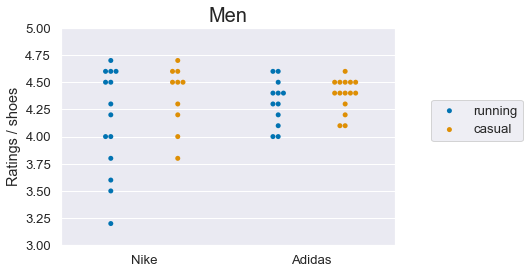

In [28]:
# rating men
%matplotlib inline
sns.swarmplot(x='brand', 
              y='rating', 
              data=men_unique_df.loc[men_unique_df.review >=20,],  # items with at least 20 reviews
              hue='type', 
              dodge=True, # 2. Separate points by hue
              palette="colorblind").set(xticklabels=['Nike', 'Adidas'])
plt.xlabel('')
plt.ylabel('Ratings / shoes')
plt.title('Men', {'fontsize': 20})
plt.ylim(3,5)
plt.legend(['running', 'casual'], bbox_to_anchor=(1.4, 0.7))
# adidas rating is centered around 4-5, nike's is more spread out

men_unique_df.loc[(men_unique_df.review >=20) & (men_unique_df.brand == 'nike') & (men_unique_df.rating <4),]
# look at word cloud for Men's Nike Air Zoom Mariah Flyknit Racer

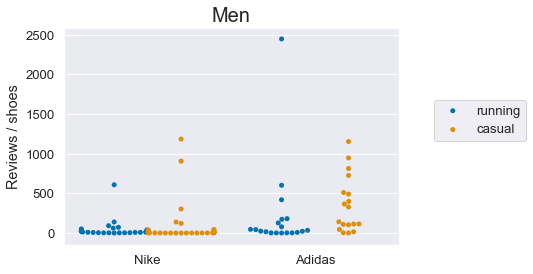

In [29]:
# review men
sns.swarmplot(x='brand', 
              y='review', 
              data=men_unique_df, 
              hue='type', 
              dodge=True,
              palette="colorblind").set(xticklabels=['Nike', 'Adidas'])
plt.xlabel('')
plt.ylabel('Reviews / shoes')
plt.title('Men', {'fontsize': 20})
plt.legend(['running', 'casual'], bbox_to_anchor=(1.4, 0.7))
# addidas has more items that have reviews over 500, indicating it's a more popular brand
# adidas's casual shoes seems to be developing into a strong pipeline with similar styles for casual shoes?


,item,color,price,saleprice,review,rating,gender,brand,type
42,Men's adidas UltraBOOST Running Shoes,9,200.0,NaN,2447.0,4.6,men,adidas,running
54,Men's adidas Superstar Casual Shoes,7,90.0,37.48,1154.0,4.5,men,adidas,casual
38,Men's adidas NMD Runner R1 Casual Shoes,13,130.0,99.98,947.0,4.4,men,adidas,casual
86,Men's adidas NMD Runner XR1 Casual Shoes,2,150.0,89.99,814.0,4.5,men,adidas,casual
183,Men's adidas NMD R2 Casual Shoes,10,130.0,67.48,727.0,4.5,men,adidas,casual
103,Men's adidas UltraBOOST Uncaged Running Shoes,2,180.0,112.49,603.0,4.6,men,adidas,running
125,Men's adidas EQT BOOST Support 93/17 Casual Shoes,2,180.0,89.98,512.0,4.5,men,adidas,casual
132,Men's adidas I-5923 Runner Casual Shoes,13,130.0,109.98,492.0,4.4,men,adidas,casual
90,Men's adidas PureBOOST Running Shoes,3,170.0,109.98,420.0,4.4,men,adidas,running
72,Men's adidas EQT Support ADV Casual Shoes,9,110.0,79.98,400.0,4.2,men,adidas,casual


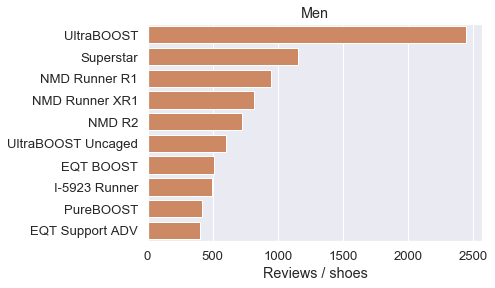

In [30]:
# Adidas top 10 (men)
top_ad_men = adidas_men.nlargest(10,'review')
sns.barplot(x='review', y='item', data=top_ad_men, ci=None, color="#dd8452").\
set(yticklabels= ['UltraBOOST', 'Superstar', 'NMD Runner R1', 'NMD Runner XR1', 'NMD R2',\
                 'UltraBOOST Uncaged', 'EQT BOOST', 'I-5923 Runner', 'PureBOOST', 'EQT Support ADV'])

plt.xlabel('Reviews / shoes')
plt.ylabel('')
plt.title('Men')
#plt.rcParams['figure.figsize']=4,8
top_ad_men

,item,color,price,saleprice,review,rating,gender,brand,type
315,Men's Nike Roshe One Casual Shoes,3,74.99,48.74,1185.0,4.6,men,nike,casual
56,Men's Nike Air Force 1 Low Casual Shoes,1,100.00,NaN,907.0,4.5,men,nike,casual
152,Men's Nike Air Huarache Run Running Shoes,16,110.00,See price in cart,609.0,4.6,men,nike,running
134,Men's Nike Air Force 1 Mid Casual Shoes,3,94.99,69.98,304.0,4.6,men,nike,casual
189,Men's Nike Air Max 95 Running Shoes,1,170.00,NaN,140.0,4.5,men,nike,running
35,Men's Nike Roshe Two Casual Shoes,3,89.99,44.98,139.0,4.2,men,nike,casual
311,Men's Nike Air Huarache Run Ultra Casual Shoes,4,120.00,See price in cart,122.0,4.7,men,nike,casual
227,Men's Nike Zoom All Out Low Running Shoes,1,140.00,NaN,93.0,4.0,men,nike,running
122,Men's Nike Zoom Fly Running Shoes,4,150.00,89.98,73.0,4.3,men,nike,running
150,Men's Nike Air Huarache Run Premium Running Shoes,9,120.00,74.98,63.0,4.6,men,nike,running


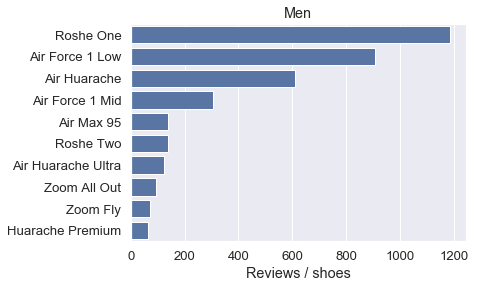

In [31]:
# Nike top 10 (men)
top_nike_men = nike_men.nlargest(10,'review')
sns.barplot(x='review', y='item', data=top_nike_men, ci=None, color="#4c72b0").\
set(yticklabels= ['Roshe One', 'Air Force 1 Low', 'Air Huarache', 'Air Force 1 Mid', 'Air Max 95',\
                 'Roshe Two', 'Air Huarache Ultra', 'Zoom All Out', 'Zoom Fly', 'Huarache Premium'])

plt.xlabel('Reviews / shoes')
plt.ylabel('')
plt.title('Men')
top_nike_men
# nike_col_men[nike_col_men['item'].str.contains("Air Force")] 
# Men's Nike Roshe One Casual Shoes, Men's Nike Air Force 1 Low Casual Shoes around 1000 reviews 
# for Roshe series: promote Men's Nike Roshe Two Casual Shoes more or comeup with similar lines 
# for air Force series: 12 lines with diverse styles but not recognized. 


In [32]:
########## WOMEN DATA ANALYSIS ##############################################################################

In [33]:
# item count, review count, max review number for women
women_sum = women_unique_df[['item', 'review', 'rating', 'brand', 'type']].groupby(['brand','type']).agg(colFun)

In [34]:
# Ave review, rating per item, women
women_sum.loc[:, (slice(None), 'mean')]
# shows that adidas brand is more popular than nike so WHY?? look at consumer gruoup who should they target

review    rating
                      mean      mean
brand  type                         
adidas casual   240.615385  4.338462
       running   90.333333  4.411111
nike   casual    38.153846  4.179487
       running   33.826087  3.826087

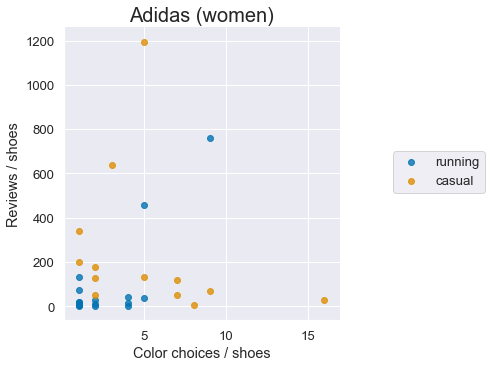

In [35]:
# color vs reviews adidas women
adidas_women = women_unique_df.loc[women_unique_df.brand=='adidas',]
sns.lmplot("color", "review", adidas_women, fit_reg=False, hue="type", palette="colorblind", legend = False)
plt.xlabel('Color choices / shoes')
plt.ylabel('Reviews / shoes')
plt.title('Adidas (women)', {'fontsize': 20})
plt.legend(['running', 'casual'], bbox_to_anchor=(1.55, 0.6)) 

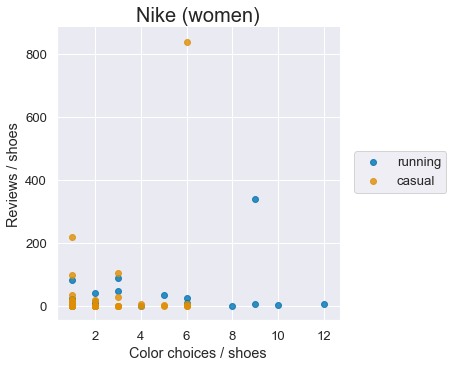

In [36]:
# color vs reviews nike women
nike_women = women_unique_df.loc[women_unique_df.brand=='nike',]
sns.lmplot("color", "review", nike_women, fit_reg=False, hue="type", palette="colorblind", legend=False)
plt.xlabel('Color choices / shoes')
plt.ylabel('Reviews / shoes')
plt.title('Nike (women)', {'fontsize': 20})
plt.legend(['running', 'casual'], bbox_to_anchor=(1.4, 0.6)) 
# same trend observed for adidas and nike

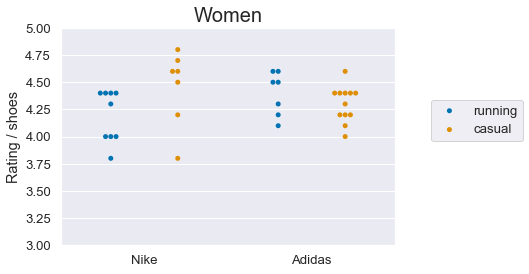

In [37]:
# rating women
%matplotlib inline
sns.swarmplot(x='brand', 
              y='rating', 
              data=women_unique_df.loc[women_unique_df.review >=20,],  # items with at least 20 reviews
              hue='type', 
              dodge=True, # 2. Separate points by hue
              palette="colorblind").set(xticklabels=['Nike', 'Adidas'])
plt.xlabel('')
plt.ylabel('Rating / shoes')
plt.title('Women', {'fontsize': 20})
plt.ylim(3,5)
plt.legend(['running', 'casual'], bbox_to_anchor=(1.4, 0.7))
# same trend as men

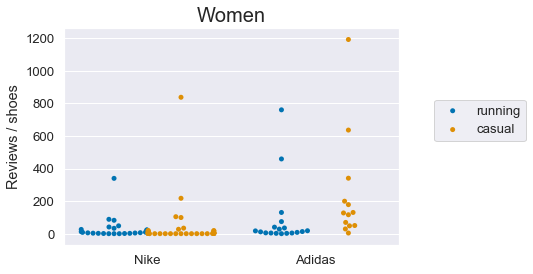

In [38]:
# review women
sns.swarmplot(x='brand', 
              y='review', 
              data=women_unique_df, 
              hue='type', 
              dodge=True, # 2. Separate points by hue
              palette="colorblind").set(xticklabels=['Nike', 'Adidas'])
plt.xlabel('')
plt.ylabel('Reviews / shoes')
plt.title('Women', {'fontsize': 20})
plt.legend(['running', 'casual'], bbox_to_anchor=(1.4, 0.7))
# women follows a similar trend, more iconic shoes and adidas casual shoes seems to be developing into a strong pipeline


,item,color,price,saleprice,review,rating,gender,brand,type
101,Women's adidas Originals Superstar Casual Shoes,5,99.99,NaN,1191.0,4.4,women,adidas,casual
181,Women's adidas UltraBOOST Running Shoes,9,180.00,149.98,760.0,4.6,women,adidas,running
244,Women's adidas NMD R2 Casual Shoes,3,130.00,67.48,636.0,4.4,women,adidas,casual
274,Women's adidas UltraBOOST X Running Shoes,5,180.00,119.98,459.0,4.2,women,adidas,running
127,Women's adidas Originals Stan Smith Casual Shoes,1,74.99,NaN,341.0,4.3,women,adidas,casual
108,Women's adidas Gazelle Casual Shoes,1,79.99,29.98,200.0,4.2,women,adidas,casual
129,Women's adidas EQT Support ADV Casual Shoes,2,110.00,89.98,179.0,4.2,women,adidas,casual
98,Women's adidas UltraBOOST X Parley Running Shoes,1,180.00,NaN,131.0,4.3,women,adidas,running
22,Women's adidas NMD R1 STLT Primeknit Casual Shoes,5,170.00,99.98,131.0,4.2,women,adidas,casual
197,Women's adidas I-5923 Runner Casual Shoes,2,130.00,59.98,128.0,4.1,women,adidas,casual


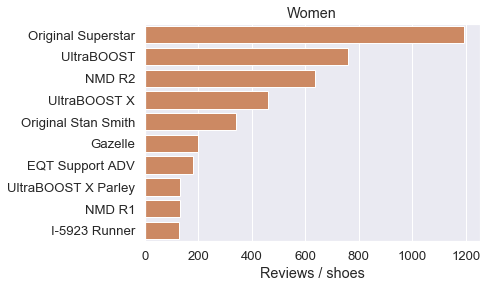

In [39]:
# Adidas top 10 (women)
top_ad_women = adidas_women.nlargest(10,'review')
sns.barplot(x='review', y='item', data=top_ad_women, ci=None, color="#dd8452").\
set(yticklabels= ['Original Superstar', 'UltraBOOST', 'NMD R2', 'UltraBOOST X', 'Original Stan Smith',\
                 'Gazelle', 'EQT Support ADV', 'UltraBOOST X Parley', 'NMD R1', 'I-5923 Runner'])

plt.xlabel('Reviews / shoes')
plt.ylabel('')
plt.title('Women')
top_ad_women
# adidas capitalize on the most popular series: UltraBOOST Running (2 lines), NMD, Originals Superstar and Stan Smith Casual Shoes


,item,color,price,saleprice,review,rating,gender,brand,type
40,Women's Nike Roshe One Casual Shoes,6,74.99,See price in cart,837.0,4.6,women,nike,casual
151,Women's Nike Air Huarache Running Shoes,9,110.00,See price in cart,340.0,4.4,women,nike,running
198,Women's Nike Air Max Thea Casual Shoes,1,94.99,37.48,218.0,3.8,women,nike,casual
26,Women's Nike Air Huarache Run Ultra Casual Shoes,3,115.00,56.24,105.0,4.5,women,nike,casual
14,Women's Nike Roshe Two Casual Shoes,1,89.99,44.98,100.0,4.2,women,nike,casual
45,Women's Nike LunarEpic Low Flyknit 2 Running S...,3,140.00,74.99,89.0,4.0,women,nike,running
49,Women's Nike Free RN Flyknit 2017 Running Shoes,1,120.00,90,83.0,4.4,women,nike,running
214,Women's Nike Air Huarache Run Premium Running ...,3,130.00,99.98,49.0,4.4,women,nike,running
155,Women's Nike Air Zoom Pegasus 34 Running Shoes,2,110.00,79.98,42.0,4.0,women,nike,running
28,Women's Nike Air Presto TD Casual Shoes,1,130.00,NaN,35.0,4.6,women,nike,casual


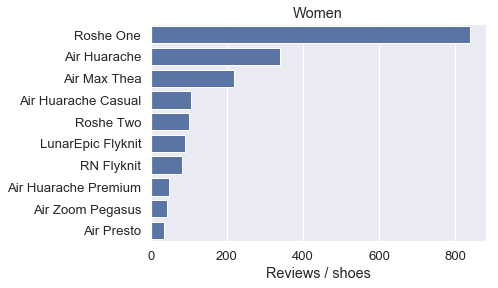

In [40]:
# Nike top 10 (women)
top_nike_women = nike_women.nlargest(10,'review')
sns.barplot(x='review', y='item', data=top_nike_women, ci=None, color="#4c72b0").\
set(yticklabels= ['Roshe One', 'Air Huarache', 'Air Max Thea', 'Air Huarache Casual', 'Roshe Two',\
                 'LunarEpic Flyknit', 'RN Flyknit', 'Air Huarache Premium', 'Air Zoom Pegasus', 'Air Presto'])

plt.xlabel('Reviews / shoes')
plt.ylabel('')
plt.title('Women')
top_nike_women

Text(0.5,1,'Pricing Distribution')

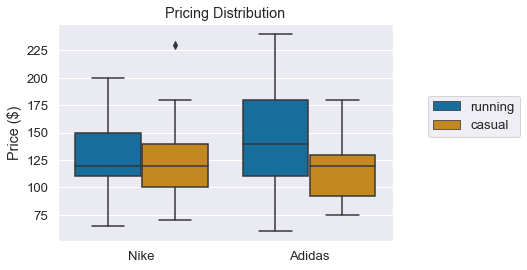

In [41]:
sns.boxplot(x="brand", y="price", hue="type", data=unique_df, palette='colorblind').set_xticklabels(['Nike','Adidas'])
plt.xlabel('')
plt.ylabel('Price ($)')
plt.legend(bbox_to_anchor=(1.4, 0.7))
plt.title('Pricing Distribution')


In [42]:
# sale trend 
# number of items that are on sale per category
sale_cat_df = unique_df[['item', 'saleprice', 'brand', 'gender','type']].groupby(['brand','gender','type'])\
                .agg('count')

# % items on sale per category
sale_cat_df.loc[:,'%items on sale'] = round(sale_cat_df.saleprice/sale_cat_df.item*100)

In [43]:
# sales trend
# contain items with sales price for all different colors (no items with see price in cart or NaN)
sale_ratio_df = combine_df.loc[combine_df.saleprice.notnull() & (combine_df.saleprice != 'See price in cart'),]

# % of markdown on AVERAGE for nike vs adidas
sale_ratio_df['discount'] = ((sale_ratio_df.price - sale_ratio_df.saleprice)/sale_ratio_df.price*100).astype(int)

ave_markdown = sale_ratio_df[['discount', 'brand', 'gender','type']].groupby(['brand','gender','type']).agg('mean')